# Prediksi Diabetes

Project ini bertujuan untuk membuat model prediksi resiko diabetes menggunakan datase **Pima Indians Diabetes** dari Kaggle.

**Dataset Source:** [Kaggle - Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## 🎯 Tujuan
- Melakukan **Exploratory Data Analysis (EDA)** untuk memahami dataset
- Melakukan preprocessing dan normalisasi data
- Melatih model **Machine Learning** untuk memprediksi risiko diabetes
- Mengevaluasi performa model

## 1. Import Library

In [ ]:
# Import library untuk analisis data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Setting style visualisasi
sns.set(style="whitegrid")

## 2. Panggil Data

In [ ]:
df = pd.read_csv('.../diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. EDA

Langkah awal analisis adalah memahami struktur data, tipe data, dan distribusi variabel.

In [6]:
# informasi data
df.info()

# statistik deskripsi
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Cek data yang 0
nilai_0 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for kolom in nilai_0:
    jumlah_0 = (df[kolom] == 0).sum()
    persen_0 = (jumlah_0 / len(df)) * 100
    print(f"{kolom}: {jumlah_0} ({persen_0:.2f}%)")

Pregnancies: 111 (14.45%)
Glucose: 5 (0.65%)
BloodPressure: 35 (4.56%)
SkinThickness: 227 (29.56%)
Insulin: 374 (48.70%)
BMI: 11 (1.43%)


### Cleansing data 0
disini bisa dilihat ada beberapa data yang mempunyai nilai 0, ada beberapa opsi
1. kita bisa mengganti nilai 0 dengan median atau mean
2. menghapus nilai 0 tersebut
3. membiarkan nilai 0 tetap ada

disini saya pilih opsi 1

In [10]:
## Nilai 0 diganti dengan median
for kolom in nilai_0:
    median_value = df[kolom].median()
    df[kolom] = df[kolom].replace(0, median_value)

(df[nilai_0] == 0).sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

C:\Users\Polsek Cibiru\AppData\Local\Temp\ipykernel_1716\3800430222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


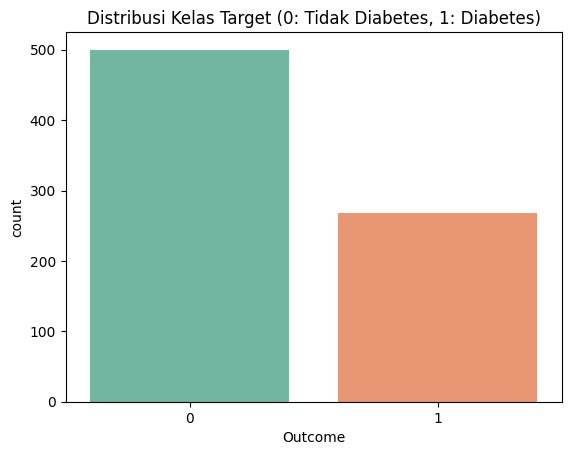

In [11]:
# Cek distribusi target
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title("Distribusi Kelas Target (0: Tidak Diabetes, 1: Diabetes)")
plt.show()

## 4. Visualisasi korelasi

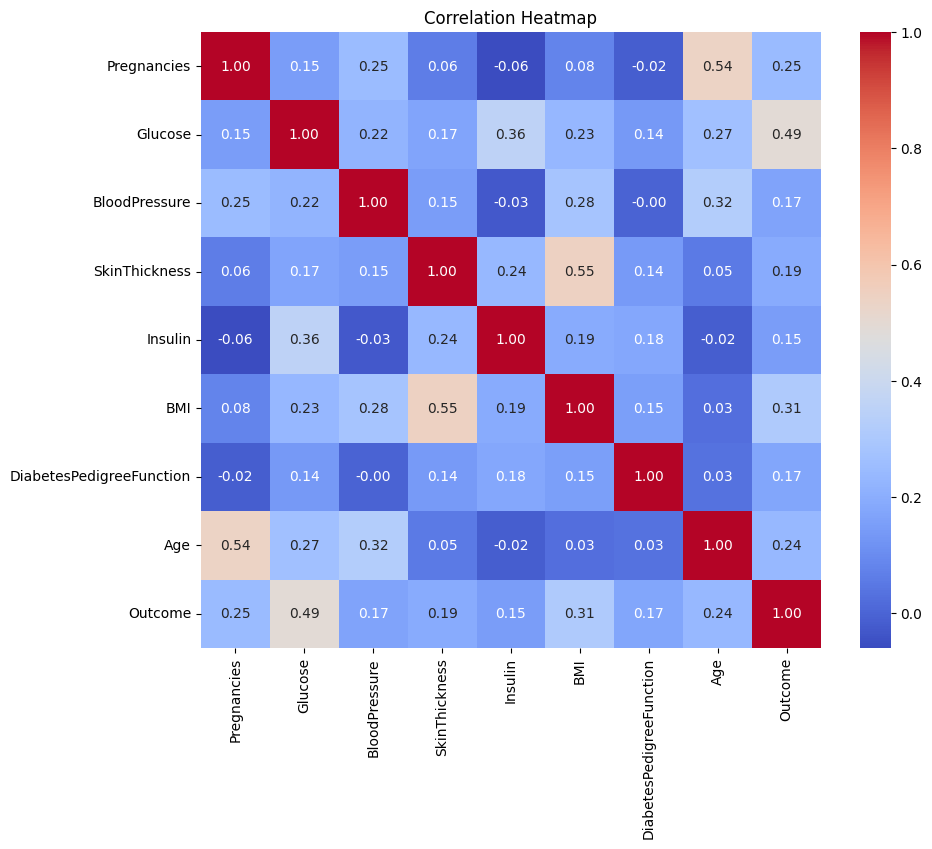

In [12]:
# Matriks korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Dari heatmap korelasi dapat dilihat bahwa yang mempunyai korelasi paling tinggi terhadap outcome adalah Glucose (0.49) artinya semakin tinggi tingkat glucose semakin tinggi resiko diabetes

## 5. Data Preprocessing

Melakukan pemisahan fitur (X) dan target (y), serta normalisasi fitur menggunakan **StandardScaler**.


In [13]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((614, 8), (154, 8))

## 6. Melatih Model
Disini memakai regresi logistik

In [14]:
# Inisialisasi dan training model
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 7. Evaluasi Model

Evaluasi menggunakan metrik:
- **Accuracy**
- **Confusion Matrix**
- **Classification Report**

In [15]:
# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7662337662337663

Confusion Matrix:
 [[82 17]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



## Kesimpulan
Model lumayan akurat secara keseluruhan (76%), tapi kurang sensitif terhadap kelas 1.

Mungkin perlu:

Mengatur ulang keseimbangan data.

Mengoptimasi parameter model.

Fokus menaikkan recall di kelas 1 agar kasus penting tidak terlewat.